In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.optim import Adam


In [ ]:
# Путь к папке с данными
data_path = "/content/eurosat/EuroSAT" 


In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
import torchvision.transforms as T
import pandas as pd

class EuroSATDataset(Dataset):
    def __init__(self, csv_path: str, imgs_path: str) -> None:
        super().__init__()

        self.csv_path = csv_path
        self.df = pd.read_csv(self.csv_path)
        self.imgs_path = imgs_path
        self.aug = T.Compose([
            T.Resize((64, 64)),
            T.Normalize((.5, .5, .5), (.5, .5, .5))
        ])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx, :]
        img = self.aug(read_image(self.imgs_path + row['Filename']) / 255.)
        label = row['Label']
        return img, label

# Пример использования для тренировочной выборки
train_dataset = EuroSATDataset(csv_path='/content/eurosat/EuroSAT/train.csv', imgs_path='/content/eurosat/EuroSAT/')
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Пример использования для валидационной выборки
valid_dataset = EuroSATDataset(csv_path='/content/eurosat/EuroSAT/validation.csv', imgs_path='/content/eurosat/EuroSAT/')
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Пример использования для тестовой выборки
test_dataset = EuroSATDataset(csv_path='/content/eurosat/EuroSAT/test.csv', imgs_path='/content/eurosat/EuroSAT/')
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:

# Загрузка предобученной модели ResNet18
model2 = models.resnet18(pretrained=True)

# Замена последнего слоя (fully connected layer) в модели для задачи классификации на 10 классов
num_classes = 10
model2.fc = nn.Linear(model2.fc.in_features, num_classes)

# Замораживание параметров всех слоев, кроме последнего (классификационного)
for param in model2.parameters():
    param.requires_grad = False

# Размораживаем только параметры последнего слоя классификации
for param in model2.fc.parameters():# Загрузите веса из сохраненного файла
    model5.load_state_dict(torch.load('savemodel2.pt'))
    param.requires_grad = True

# Определение функции потерь и оптимизатора
criterion2 = nn.CrossEntropyLoss()
optimizer2 = Adam(model2.fc.parameters(), lr=0.001)

# Перемещение модели на устройство (GPU, если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2.to(device)

# Тренировка модели (пример, на несколько эпох)
num_epochs = 15
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Валидация модели
    model2.eval()
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for images, labels in valid_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

    accuracy = total_correct / total_samples
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Validation Accuracy: {accuracy:.4f}')


Epoch 1/15, Loss: 0.4504, Validation Accuracy: 0.8183
Epoch 2/15, Loss: 1.0786, Validation Accuracy: 0.8202
Epoch 3/15, Loss: 0.9241, Validation Accuracy: 0.8207
Epoch 4/15, Loss: 0.4279, Validation Accuracy: 0.8248
Epoch 5/15, Loss: 0.5030, Validation Accuracy: 0.8204
Epoch 6/15, Loss: 0.5414, Validation Accuracy: 0.8244
Epoch 7/15, Loss: 0.6525, Validation Accuracy: 0.8163
Epoch 8/15, Loss: 0.8526, Validation Accuracy: 0.8206
Epoch 9/15, Loss: 0.4631, Validation Accuracy: 0.8189
Epoch 10/15, Loss: 0.6537, Validation Accuracy: 0.8180
Epoch 11/15, Loss: 0.8124, Validation Accuracy: 0.8206
Epoch 12/15, Loss: 0.3872, Validation Accuracy: 0.8252
Epoch 13/15, Loss: 1.0523, Validation Accuracy: 0.8180
Epoch 14/15, Loss: 1.5598, Validation Accuracy: 0.8165
Epoch 15/15, Loss: 0.1443, Validation Accuracy: 0.8200


In [ ]:
model2.state_dict()

In [ ]:
torch.save(model2.state_dict(), 'savemodel2.pt')

In [ ]:
# Путь для сохранения весов модели
weights_path = "/content/resnet18_2.pth"

# Сохранение весов
torch.save(model.state_dict(), weights_path)

# Копирование файла на локальный компьютер
from google.colab import files
files.download(weights_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
from google.colab import files
# Загрузка файла с весами на сервер Google Colab
uploaded = files.upload()

Saving resnet18_2.pth to resnet18_2.pth


In [14]:


# Загрузка предобученной модели ResNet18
model5 = models.resnet18(pretrained=True)

# Замена последнего слоя (fully connected layer) в модели для задачи классификации на 10 классов
num_classes = 10
model5.fc = nn.Linear(model5.fc.in_features, num_classes)

# Замораживание параметров всех слоев, кроме последнего (классификационного)
for param in model5.parameters():
    param.requires_grad = False

# Размораживаем только параметры последнего слоя классификации
for param in model5.fc.parameters():
    param.requires_grad = True

# Определение функции потерь и оптимизатора
criterion5 = nn.CrossEntropyLoss()
optimizer5 = Adam(model5.fc.parameters(), lr=0.001)

# Перемещение модели на устройство (GPU, если доступно)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model5.to(device)

# Получение пути к загруженному файлу
weights_path_5 = next(iter(uploaded))

# Загрузка весов из файла
loaded_state_dict = torch.load(weights_path_5, map_location=device)

# Словарь сопоставления числовых предсказаний с классами
class_mapping = {
    0: "AnnualCrop",
    1: "Forest",
    2: "HerbaceousVegetation",
    3: "Highway",
    4: "Industrial",
    5: "Pasture",
    6: "PermanentCrop",
    7: "Residential",
    8: "River",
    9: "SeaLake"
}
# Установка модели в режим оценки
model5.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

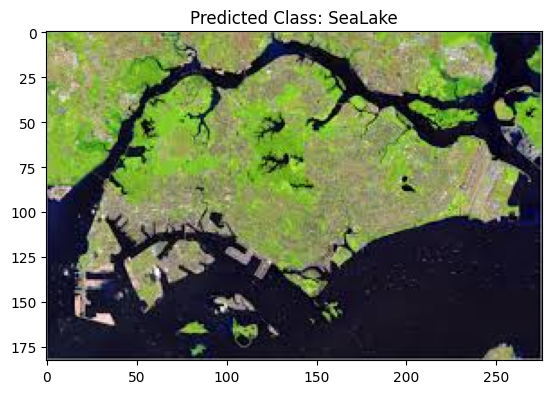

In [19]:
import io
import matplotlib.pyplot as plt
from PIL import Image
import requests
from torchvision import transforms

def predict_image(model, image_url, class_mapping, device):
    # Загрузка изображения по URL
    response = requests.get(image_url)
    img = Image.open(io.BytesIO(response.content)).convert("RGB")

    # Предобработка изображения
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image_tensor = transform(img).unsqueeze(0).to(device)

    # Предсказание с помощью модели
    with torch.no_grad():
        outputs = model(image_tensor)

    # Преобразование предсказаний в вероятности с использованием softmax
    predicted_probs = torch.softmax(outputs, dim=1)

    # Получение индекса предсказанного класса
    _, predicted_class_index = torch.max(predicted_probs, 1)
    predicted_class_index = int(predicted_class_index.item())

    # Отображение изображения и подпись предсказанного класса
    plt.imshow(img)
    predicted_class_name = class_mapping.get(predicted_class_index, f'Class {predicted_class_index}')
    plt.title(f'Predicted Class: {predicted_class_name}')
    plt.show()

# Укажите URL вашего изображения
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTR4NPCFtI1ed5vskDDEp1Vs7HCz3dNYu2ycQ&usqp=CAU"

# Предсказание с помощью модели
predict_image(model5, image_url, class_mapping, device)

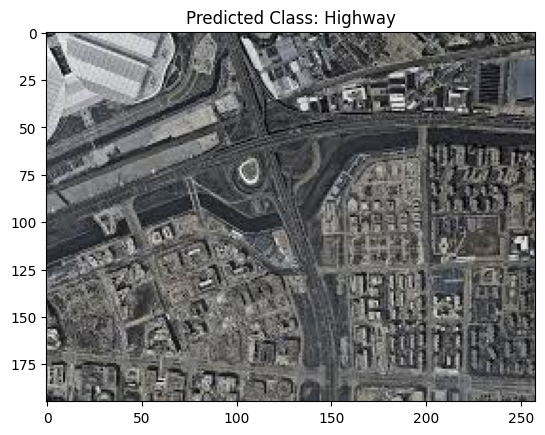

In [20]:

# Укажите URL вашего изображения
image_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSh9BLGdMNlK1CHW4DCcNI4F_SJryxJlVMyJQ&usqp=CAU"

# Предсказание с помощью модели
predict_image(model5, image_url, class_mapping, device)